# Credit Card Transactions Dataset


## Introductory concepts:
* Jupyter Notebook
* Data Science Methodology
* Dataset
* Autoencoder

### Dataset: 

The dataset was obtained from a Kaggle share, where it was found in the Kaggle repository. It contains transactions made by European cardholders with credit cards in September 2013. This set reveals transactions over two days, with a total of 284,807 transactions, among which 492 frauds were identified. The proportion of frauds with respect to total transactions is minimal, representing only 0.172%. For confidentiality reasons, the data have been subjected to a PCA transformation. The variables V1 to V28 represent the principal components obtained through PCA, with 'Time' and 'Amount' being the only characteristics that have not been altered. For more details, the repository can be consulted at the following link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


### Autoencoder:

An autoencoder is a type of artificial neural network used for unsupervised learning of data representations. It consists of two main parts: an encoder and a decoder.

During training, an autoencoder tries to minimize the difference between the input data and the reconstructed output. This forces the network to learn a useful representation of the data, as it needs to capture essential information in order to accurately reconstruct it.

## Repository on GitHub
https://github.com/JessicaChepe/DL-Deteccion-Credict-Card-Fraud-Autoencoder

## Data insights

In this notebook, we will use the creditcard.csv file, which records past credit card transactions. We will use an encoder-decoder system to reveal hidden data points and then apply a linear classifier to distinguish between fraudulent (1) and legitimate/non-fraudulent (0) credit card transactions.




## Instalemos tensorflow

In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


## Importación de librerias

In [1]:
#Manipulación de datos
import pandas as pd
import numpy as np 
import os

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn realated libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')

## Recolección de datos

### Importación del conjunto de datos

In [2]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre Procedimientos de Datos

### 1. EDA (interpretaciones) Exploratory Data Analysis 
 Visualizando algunas Estadísticas descriptiva de nuestro datos

In [3]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2. Imputación de valores perdidos

In [4]:
#revisamos los valores perdidos
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Observación: no se encuentra valores perdidos

In [5]:
#Información general de los datos
dataset.info()
print("===="*30)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# etiquetas de clase o target, en este caso es "is_fraud"
print(f"Las clases únicas en el conjunto de datos son: {np.unique(dataset['Class'])}")

Las clases únicas en el conjunto de datos son: [0 1]


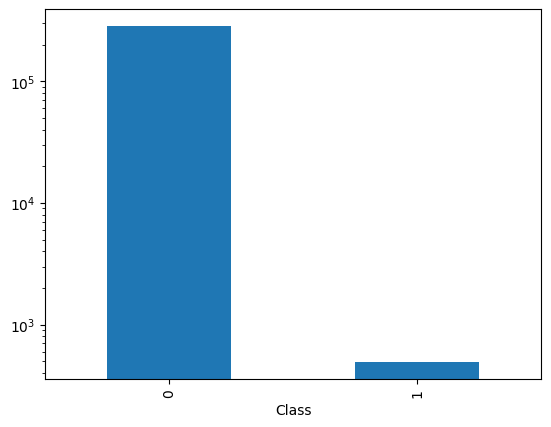

In [7]:
dataset.groupby('Class')['Class'].count().plot.bar(logy=True);

### 2. Transformación de Variables
La transformación de datos es uno de los pasos del procesamiento de datos. Necesitamos transaformar el valor de ciertos atributos para que tenga sentido en el análisis posterior.

In [8]:
#Cambiar la variable time a días
dataset['Time'] = dataset['Time'].apply(lambda t: (t/3600) % 24)

In [9]:
#Muestra de la data
# normal_trans = dataset['Class'] == 0].sample(frac=0.5)
genuine_trans = dataset[dataset['Class'] == 0].sample(4000)
fraud_trans = dataset[dataset['Class'] == 1]#.sample(192)

In [10]:
#aqui estoy uniendo  entre genuine y fraud trans
#reduced_set = genuine_trans.append(fraud_trans).reset_index(drop=True)
reduced_set = pd.concat([genuine_trans, fraud_trans], ignore_index=True)

In [11]:
print(f"Forma limpiada del conjunto de datos: {reduced_set.shape}")

Forma limpiada del conjunto de datos: (4492, 31)


## Split del Dataset

In [12]:
# Splitting the dataset into X and y features, devisión de mi conjunto de datos
y = reduced_set['Class']
X = reduced_set.drop('Class', axis=1)

In [13]:
print(f"Shape of Features: {X.shape} and Target: {y.shape}")

Shape of Features: (4492, 30) and Target: (4492,)


## Visualice los datos con t-SNE
*TNSE (incrustación de vecinos estocásticos distribuidos en t)* es uno de los métodos de reducción de dimensionalidad distintos de PCA y SVD. Esto suprimirá algo de ruido y aceelerará y el calculo de la distancia por pares entre muestras.

In [14]:
def dimensionality_plot(X,y):
    sns.set(style='whitegrid', palette =  'muted')
    #Intializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state = 42)
    
    # Fitting the data
    X_trans = tsne.fit_transform(X)
    
    plt.figure(figsize = (12,8))
    
    
    plt.scatter(X_trans[np.where(y == 0), 0], X_trans[np.where(y==0), 1], marker='o', color='g', linewidths=1, alpha=0.8, label='Genuine')
    plt.scatter(X_trans[np.where(y == 1), 0], X_trans[np.where(y==1), 1], marker='o', color='red', linewidths=1, alpha=0.8, label='Fraud')
    
    plt.legend(loc = 'best')
    
    plt.show()    

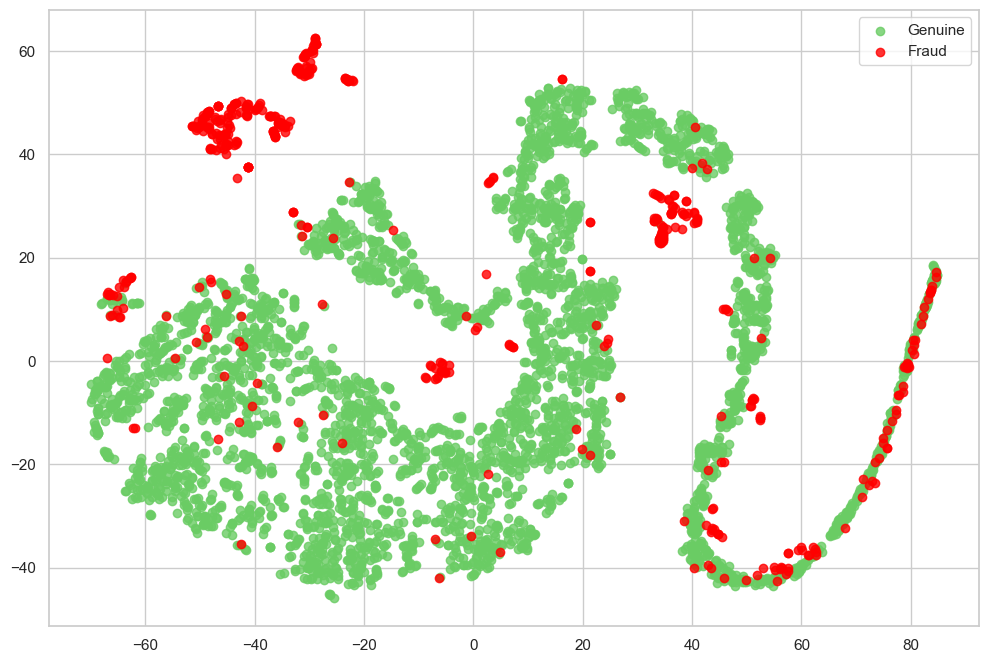

In [15]:
# Graficando las dimensionalidad
dimensionality_plot(X,y)

Observación: se puede visualizar que estan disperso y para concentrarlo utilizaremos el modelo Autoencoder

## Normalización y Scale de los features

In [16]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_genuine = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

## Construcción de Modelo Autoencoder

In [17]:
print(f"Forma de los datos de entrada: {X.shape[1]}")

Forma de los datos de entrada: 30


Definimos el modelo autoncoder. Como necesitamos acceder a la salida de la etapa del encoder, necesitaremos definir el modelo utilizando un método ligeramente diferente al utilizado anteriormente. Define una capa de entrada de 30 aunidades:

In [18]:
#Capa de entrada con forma de los features / columnas del conjunto de datos
input_layer = Input(shape = (X.shape[1], ))

Defina una Dense layer posterior de 100 unidades respectivamente y una función de activación de tanh como etapa de codificación. Tenga en cuenta que hemos asignado el layer a una variable y pasado la capa anterior a un método de llamada para clase:

In [19]:
# Construcción del encoder network / Construcción de la red codificadora (encoder)
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation='relu')(encoded)

# Decoder network / Construcción de la red codificadora (encoder)
decoded = Dense(12, activation='tanh')(encoded)
decoded = Dense(25, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(decoded)
decoded = Dense(100, activation='tanh')(decoded)

# Output layer / Capa de salida
output_layer = Dense(X.shape[1], activation='relu')(decoded)

# Building a model / Construir el modelo de autoencoder
auto_encoder = Model(input_layer, output_layer)


In [20]:
# Compilar el modelo de autoencoder
auto_encoder.compile(optimizer='Adadelta', loss='mse')

# Entrenar el modelo de autoencoder
auto_encoder.fit(X_scaled_genuine, X_scaled_genuine, batch_size=32, epochs=10, shuffle=True, validation_split=0.20)

import psutil

# Obtener el consumo de CPU, memoria y disco actual
cpu_percent = psutil.cpu_percent(interval=1)  # Uso de CPU en los últimos segundos
memory_info = psutil.virtual_memory()
disk_usage = psutil.disk_usage('/')

print(f"Uso de CPU: {cpu_percent}%")
print(f"Uso de memoria: {memory_info.percent}%")
print(f"Uso de disco: {disk_usage.percent}%")

Epoch 1/10


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6734 - val_loss: 1.6051
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 1.8218 - val_loss: 1.6047
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 1.6935 - val_loss: 1.6042
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8956 - val_loss: 1.6038
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1.5582 - val_loss: 1.6033
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 2.0266 - val_loss: 1.6029
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.8343 - val_loss: 1.6025
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7313 - val_loss: 1.6021
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.6294 - val_loss: 1.6017
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6373 - val_loss: 1.6013
Uso de CPU: 35.3%
Uso de memoria: 58.5%
Uso de disco: 2.8%


## Usamos el Autoencode par encode los datos

In [21]:
latent_model = Sequential()
latent_model.add(auto_encoder.layers[0])
latent_model.add(auto_encoder.layers[1])
latent_model.add(auto_encoder.layers[2])
latent_model.add(auto_encoder.layers[3])
latent_model.add(auto_encoder.layers[4])

In [22]:
genuine_tran_points = latent_model.predict(X_scaled_genuine)
fraud_tran_points = latent_model.predict(X_scaled_fraud)
# Making as a one collection
encoded_X = np.append(genuine_tran_points, fraud_tran_points, axis=0)
y_genuine = np.zeros(genuine_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_genuine, y_fraud, axis=0)

  1/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


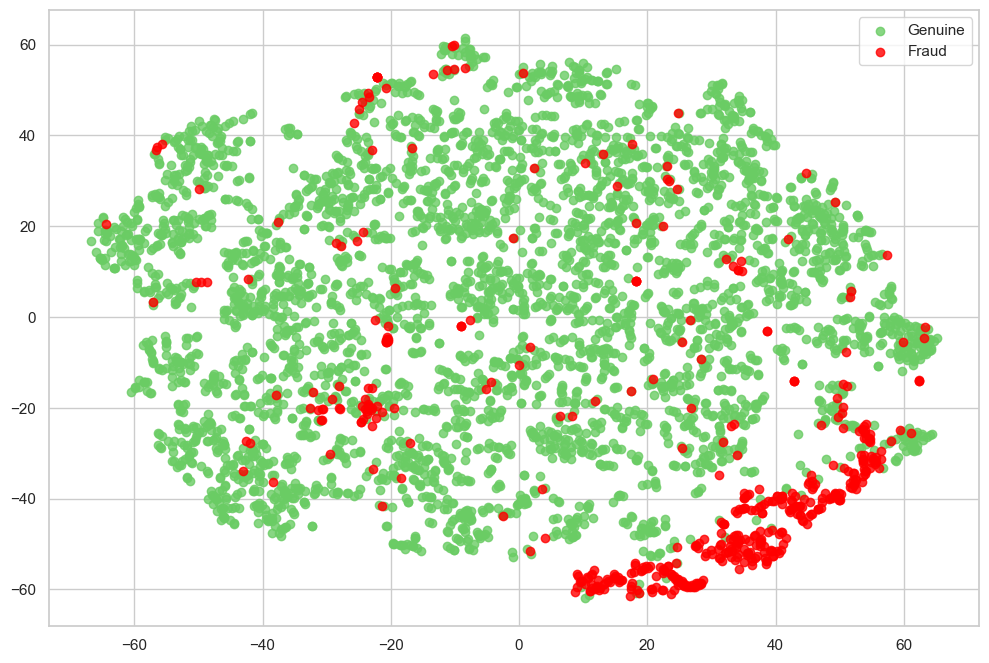

In [23]:
#llamamos a la función para graficar TSNE
dimensionality_plot(encoded_X, encoded_y)

Podemo observar que lo spuntos de datos de fraude codificados se han movido hacia un grupo, mientras que solo hay unos pocos puntos de datos de transacciones de fraudes entre los puntos de datos de transacciones normales

## Entrenamiento de Modelo

### Split en Train y Test

Indica que el 30% de los datos se utilizarán como conjunto de prueba y el 70% restante se utilizará como conjunto de entrenamiento.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

In [25]:
X_train.shape, X_test.shape

((3144, 30), (1348, 30))

In [26]:
print(f"Encoded train fata X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test: {X_enc_test.shape}, Y_test: {y_enc_test.shape}")
print(f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X:text : {X_test.shape}, Y_test: {y_test.shape}")

Encoded train fata X: (3144, 12), Y: (3144,), X_test: (1348, 12), Y_test: (1348,)
Actual train & test data X: (3144, 30), Y: (3144, 30), X:text : (1348, 30), Y_test: (1348,)


In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define el modelo de detección de fraudes, por ejemplo, un clasificador SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')

# Definir la estrategia de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Almacena las métricas de evaluación
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Realiza la validación cruzada
for train_index, test_index in cv.split(encoded_X, encoded_y):
    X_train, X_test = encoded_X[train_index], encoded_X[test_index]
    y_train, y_test = encoded_y[train_index], encoded_y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calcula estadísticas de rendimiento
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print(f"Accuracy: {mean_accuracy}")
print(f"Precision: {mean_precision}")
print(f"Recall: {mean_recall}")
print(f"F1 Score: {mean_f1}")


Accuracy: 0.9519144013021149
Precision: 0.8923098791755507
Recall: 0.6382189239332096
F1 Score: 0.7439251248233019


## Non-linear Classifier

In [28]:
# Instance of SVM
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_predictions = svc_clf.predict(X_test)

In [29]:
print("Classification report \n {0}".format(classification_report(y_test,svc_predictions)))

Classification report 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       800
         1.0       0.93      0.77      0.84        98

    accuracy                           0.97       898
   macro avg       0.95      0.88      0.91       898
weighted avg       0.97      0.97      0.97       898



## Clasificador lineal

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(X_enc_train, y_enc_train)

#predict the test data
predictions = lr_clf.predict(X_enc_test)

In [31]:
print("Informe de clasificación \n {0}".format(classification_report(y_enc_test, predictions)))

Informe de clasificación 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1208
         1.0       0.86      0.54      0.67       140

    accuracy                           0.94      1348
   macro avg       0.91      0.77      0.82      1348
weighted avg       0.94      0.94      0.94      1348



In [32]:
print("La puntuación de Exactitud es: {:.2f}".format(accuracy_score(y_enc_test,predictions)))

La puntuación de Exactitud es: 0.94


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# Predecir las probabilidades en lugar de las etiquetas binarias
# Esto devolverá la probabilidad de pertenecer a la clase positiva
probabilities = lr_clf.predict_proba(X_enc_test)[:, 1]

In [34]:
# Calcular el AUC
auc_score = roc_auc_score(y_enc_test, probabilities)
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_enc_test, probabilities)

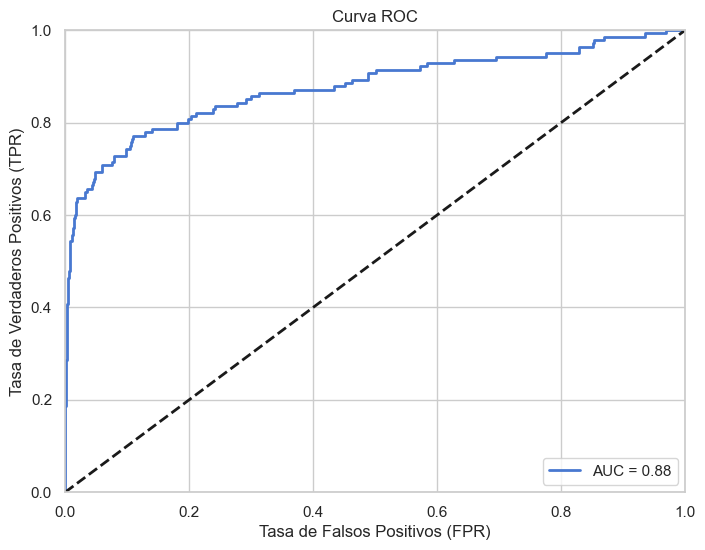

In [35]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusión
En este análisis, hemos encontrado que el clasificador Support Vector Machine es capaz de clasificar los datos hasta un 93% sincodificar ni decodificar. Sin embargo, el efecto del decodificador automatico se produce lcuando los datos se transforman de no lineales a separables linealmente, luego el clasificador lineal como Regresión logística podría funcionar de mejor manera.

La puntuación de la regresión logística puede llegar hasta 97%, esto es algo que no ocurre con demasiada frecuencia en el algoritmo logístico.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

# Crear un clasificador logístico
lr_clf = LogisticRegression()

# Define el número de pliegues (k)
k = 5  # Puedes ajustar el número de pliegues según tus necesidades

# Crea un objeto KFold para controlar la división de los datos en k pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Realiza la validación cruzada en tu clasificador logístico
scores = cross_val_score(lr_clf, X_enc_train, y_enc_train, cv=kf, scoring='accuracy')

# Calcula el promedio de las puntuaciones de precisión
promedio_precision = scores.mean()

# Las puntuaciones de precisión para cada pliegue se encuentran en 'scores'
# 'promedio_precision' contiene el promedio de las puntuaciones de precisión


In [37]:
print(promedio_precision)

0.9462461899891649


In [38]:
# Crear y entrenar el clasificador
lr_clf = LogisticRegression()
lr_clf.fit(X_enc_train, y_enc_train)

# Predecir en los datos de prueba
y_test_pred = lr_clf.predict(X_enc_test)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_enc_test, y_test_pred)
print("Matriz de Confusión:")
print(confusion_matrix)

# Calcular la tasa de falsos positivos (FPR)
tn, fp, fn, tp = confusion_matrix.ravel()
fpr = fp / (fp + tn)
print("Tasa de Falsos Positivos (FPR):", fpr)

Matriz de Confusión:
[[1196   12]
 [  64   76]]
Tasa de Falsos Positivos (FPR): 0.009933774834437087


In [39]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo (reemplaza con tu propio modelo)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# Realizar predicciones y obtener las probabilidades de predicción
y_pred_proba = lr_clf.predict_proba(X_test)

# Calcular la certeza promedio
certeza_promedio = y_pred_proba[:, 1].mean() * 100  # Usamos [:, 1] para obtener las probabilidades de la clase positiva
print(f"Certeza promedio: {certeza_promedio:.2f}%")


Certeza promedio: 11.81%
